In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

base = pd.read_csv('fertility_Diagnosis.txt', sep =',', header = None)


# verificando informações da base:
base.tail()

,0,1,2,3,4,5,6,7,8,9
95,-1.0,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.0,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.0,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.0,0.64,1,0,1,0,1.0,0,0.19,N
99,-1.0,0.69,0,1,1,0,0.6,-1,0.19,N


In [4]:
# verificando informções da base:
base.isnull().sum()# linhas com valores nulos

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [5]:
# verificando informções da base:
base.describe(include='all')# informações como média, mediana, etc

,0,1,2,3,4,5,6,7,8,9
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88
mean,-0.078900,0.669000,0.870000,0.440000,0.510000,0.190000,0.832000,-0.350000,0.406800,NaN
std,0.796725,0.121319,0.337998,0.498888,0.502418,0.580752,0.167501,0.808728,0.186395,NaN
min,-1.000000,0.500000,0.000000,0.000000,0.000000,-1.000000,0.200000,-1.000000,0.060000,NaN
25%,-1.000000,0.560000,1.000000,0.000000,0.000000,0.000000,0.800000,-1.000000,0.250000,NaN
50%,-0.330000,0.670000,1.000000,0.000000,1.000000,0.000000,0.800000,-1.000000,0.380000,NaN
75%,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.500000,NaN


Text(2.5, 0, 'Matriz de correlação')

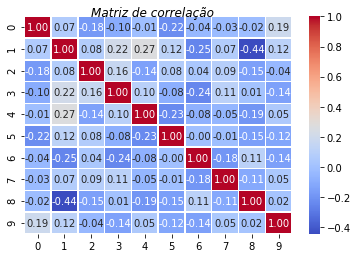

In [6]:
#correlação entre as variaveis
base1 = base
g = {'N': 0, 'O': 1}
for data in base1:
    if data == 9 :
        base1[9] = base1[9].map(g)
               
matriz_correl = sns.heatmap(base1.corr(), annot = True, fmt='.2f', cmap= 'coolwarm',linewidths=.5)
plt.text(2.5,0, "Matriz de correlação", fontsize = 12, color='Black', fontstyle='italic')


In [7]:
#correlação entre as variaveis
lista = []
lista = base1.corr()[9]
for i in range(lista.size):
    if lista[i] == max(base1.corr().iloc[0:8,9]):
        print('Variável mais importante(maior correlação) é %i com o valor de %f' % (i,lista[i]))


Variável mais importante(maior correlação) é 0 com o valor de 0.192417


In [8]:
####################### MLP: #######################
previsores = base.iloc[:,[0,3,6]].values
classe = base.iloc[:,9].values


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.3, random_state = 0)


from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(verbose = True,
                              max_iter=10000,
                              tol = 0.000010)


#######################Melhores parametros?#######################
from sklearn.model_selection import GridSearchCV

parameter_space = {
    'hidden_layer_sizes': [(50,50,50),(30,30,30), (100,100,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(previsores_treinamento, classe_treinamento)

# Estimator
print('Estimator:\n', clf.best_estimator_)

Iteration 1, loss = 0.61373533
Iteration 2, loss = 0.61152642
Iteration 3, loss = 0.60841156
Iteration 4, loss = 0.60451712
Iteration 5, loss = 0.59996284
Iteration 6, loss = 0.59486071
Iteration 7, loss = 0.58931420
Iteration 8, loss = 0.58341791
Iteration 9, loss = 0.57725746
Iteration 10, loss = 0.57090956
Iteration 11, loss = 0.56444227
Iteration 12, loss = 0.55791542
Iteration 13, loss = 0.55138099
Iteration 14, loss = 0.54488372
Iteration 15, loss = 0.53846162
Iteration 16, loss = 0.53214656
Iteration 17, loss = 0.52596485
Iteration 18, loss = 0.51993780
Iteration 19, loss = 0.51408227
Iteration 20, loss = 0.50841119
Iteration 21, loss = 0.50293402
Iteration 22, loss = 0.49765726
Iteration 23, loss = 0.49258478
Iteration 24, loss = 0.48771829
Iteration 25, loss = 0.48305759
Iteration 26, loss = 0.47860095
Iteration 27, loss = 0.47434535
Iteration 28, loss = 0.47028671
Iteration 29, loss = 0.46642012
Iteration 30, loss = 0.46274000
Iteration 31, loss = 0.45924031
Iteration 32, los

Iteration 254, loss = 0.38757378
Iteration 255, loss = 0.38755827
Iteration 256, loss = 0.38754287
Iteration 257, loss = 0.38752757
Iteration 258, loss = 0.38751236
Iteration 259, loss = 0.38749725
Iteration 260, loss = 0.38748224
Iteration 261, loss = 0.38746732
Iteration 262, loss = 0.38745250
Iteration 263, loss = 0.38743777
Iteration 264, loss = 0.38742312
Iteration 265, loss = 0.38740857
Iteration 266, loss = 0.38739410
Iteration 267, loss = 0.38737972
Iteration 268, loss = 0.38736542
Iteration 269, loss = 0.38735121
Iteration 270, loss = 0.38733708
Iteration 271, loss = 0.38732302
Iteration 272, loss = 0.38730905
Iteration 273, loss = 0.38729516
Iteration 274, loss = 0.38728134
Iteration 275, loss = 0.38726760
Iteration 276, loss = 0.38725394
Iteration 277, loss = 0.38724035
Iteration 278, loss = 0.38722683
Iteration 279, loss = 0.38721339
Iteration 280, loss = 0.38720001
Iteration 281, loss = 0.38718671
Iteration 282, loss = 0.38717347
Iteration 283, loss = 0.38716030
Iteration 

In [9]:
####################################################################

classificador = clf.best_estimator_
previsoes = classificador.predict(previsores_teste)

from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)
print('Precisão do modelo',precisao)

classificador.predict_proba

Precisão do modelo 0.9333333333333333


<bound method MLPClassifier.predict_proba of MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=1e-05, validation_fraction=0.1, verbose=True,
              warm_start=False)>